<a href="https://colab.research.google.com/github/Rinzler122/Series-de-tiempo/blob/main/Series_de_tiempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
raw_data = pd.read_csv("Index2018.csv")

In [ ]:
df = raw_data.copy()

In [ ]:
df.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [ ]:
df.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [ ]:
df.isna()

,date,spx,dax,ftse,nikkei
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
6264,False,False,False,False,False
6265,False,False,False,False,False
6266,False,False,False,False,False
6267,False,False,False,False,False


In [ ]:
df.isna().sum() #contar valores NA

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

**Plotting the Data**

In [ ]:
import matplotlib.pyplot as plt

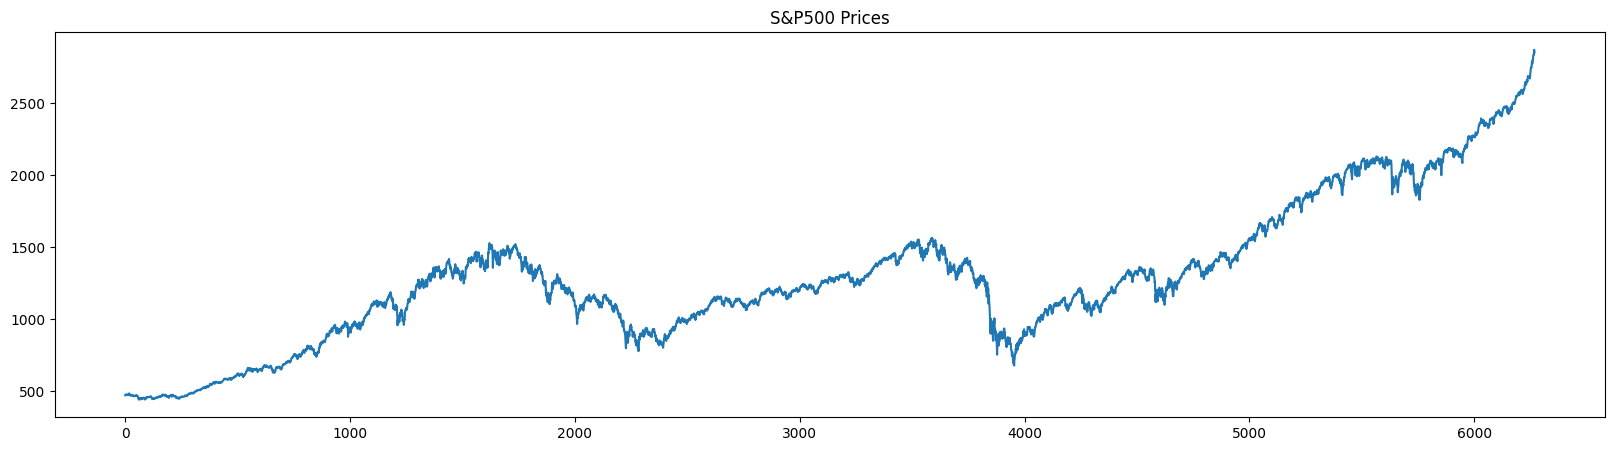

In [ ]:
df.spx.plot(figsize=(20,5), title="S&P500 Prices")
plt.show()

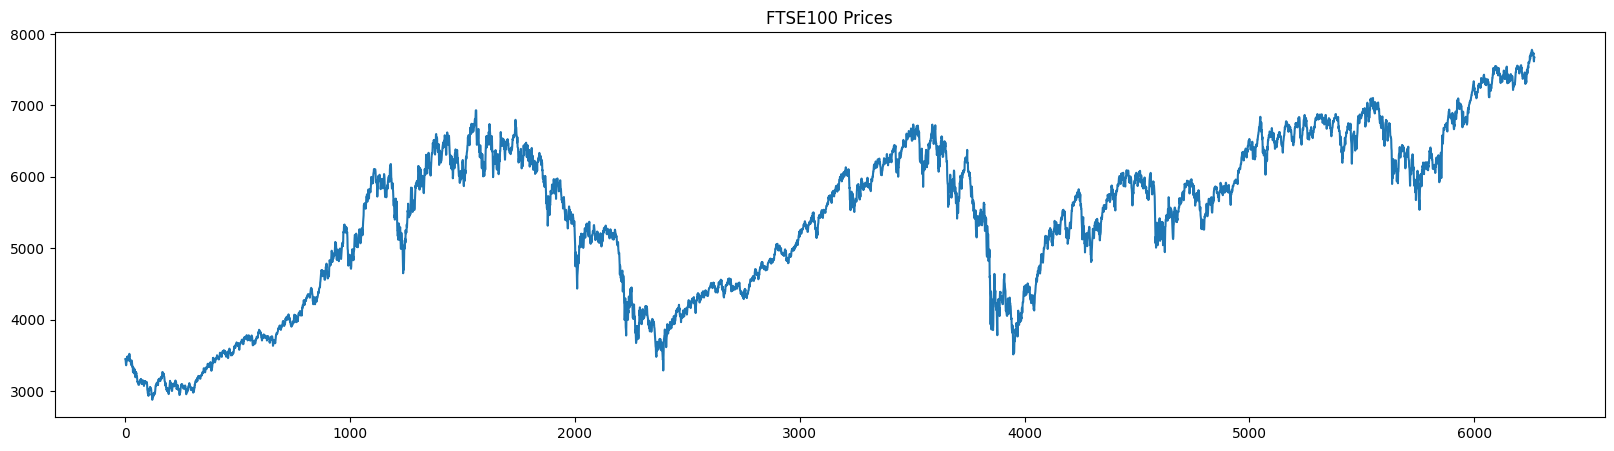

In [ ]:
df.ftse.plot(figsize=(20,5), title="FTSE100 Prices")
plt.show()

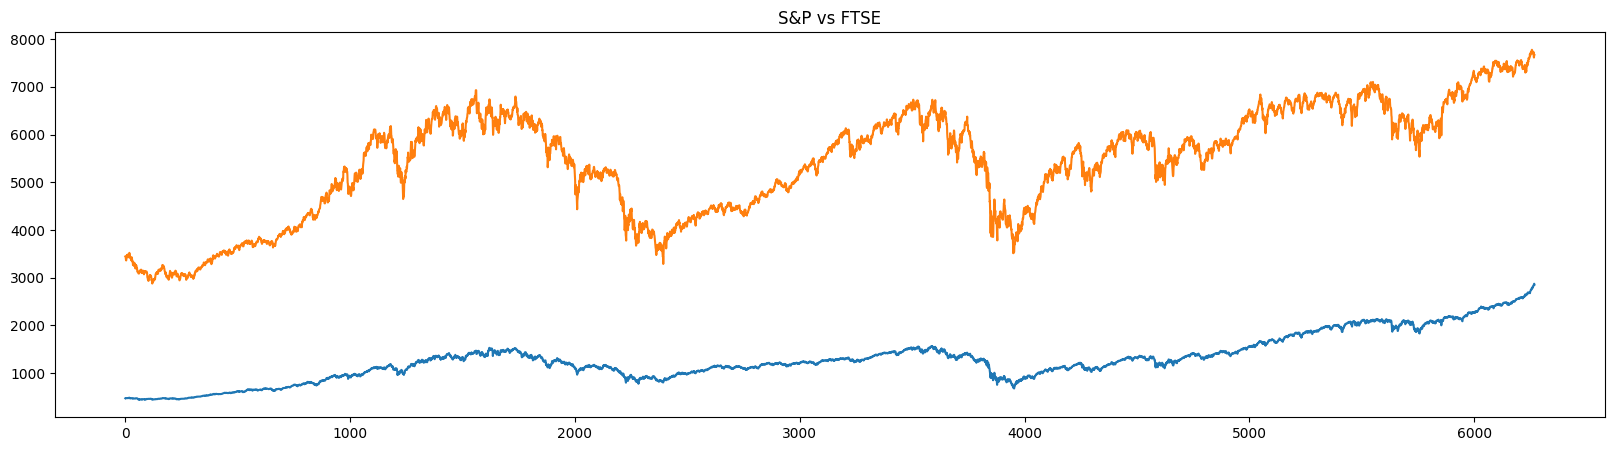

In [ ]:
df.spx.plot(figsize=(20,5), title="S&P500 Prices")
df.ftse.plot(figsize=(20,5), title="FTSE100 Prices")
plt.title("S&P vs FTSE")
plt.show()

**The QQ plot**

In [ ]:
import scipy.stats as stats

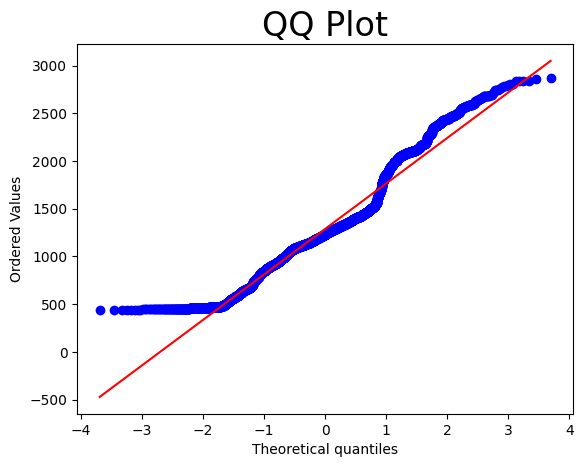

In [ ]:
stats.probplot(df.spx, plot = plt)
plt.title ("QQ Plot", size = 24)
plt.show()  # No se distribuyen de forma normal

In [ ]:
df.date = pd.to_datetime(df.date, dayfirst = True)

In [ ]:
df.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [ ]:
df.date.describe()

<ipython-input-16-f7d3fa946723>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.date.describe()


count                    6269
unique                   6269
top       1994-01-07 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

In [ ]:
df.set_index("date", inplace=True)

In [ ]:
df

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01
1994-01-10,475.270000,2225.00,3440.580000,18443.44
1994-01-11,474.130000,2228.10,3413.770000,18485.25
1994-01-12,474.170000,2182.06,3372.020000,18793.88
1994-01-13,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...
2018-01-23,2839.130362,13559.60,7731.827774,24124.15
2018-01-24,2837.544008,13414.74,7643.428966,23940.78
2018-01-25,2839.253031,13298.36,7615.839954,23669.49


In [ ]:
df = df.asfreq('d')

In [ ]:
df = df.asfreq('b')


In [ ]:
df.spx = df.spx.fillna(method='ffill')
df.dax = df.dax.fillna(method='bfill')
df.ftse = df.ftse.fillna(method='ffill')
df.nikkei = df.nikkei.fillna(method = "ffill")
# La media no tiene sentido

In [ ]:
df.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [ ]:
df

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01
1994-01-10,475.270000,2225.00,3440.580000,18443.44
1994-01-11,474.130000,2228.10,3413.770000,18485.25
1994-01-12,474.170000,2182.06,3372.020000,18793.88
1994-01-13,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...
2018-01-23,2839.130362,13559.60,7731.827774,24124.15
2018-01-24,2837.544008,13414.74,7643.428966,23940.78
2018-01-25,2839.253031,13298.36,7615.839954,23669.49


*Utilizamos unicamente una variable que es la que necesitamos.*


In [ ]:
df['Market value'] = df.spx

In [ ]:
del df ['dax']
del df ['spx']
del df ['ftse']
del df ['nikkei']

In [ ]:
df.describe()

,Market value
count,6277.000000
mean,1288.642547
std,487.868210
min,438.920000
25%,992.715221
50%,1233.761241
75%,1460.250000
max,2872.867839


Separar la serie en entrenamiento y prueba.

In [ ]:
size = int(len(df)*0.8)
size

5021

In [ ]:
df_training = df.iloc[:size]

In [ ]:
df_training  # Conjunto de entrenamiento

,Market value
date,
1994-01-07,469.900000
1994-01-10,475.270000
1994-01-11,474.130000
1994-01-12,474.170000
1994-01-13,472.470000
...,...
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978


In [ ]:
df_test = df.iloc[size:]

In [ ]:
df_test #El de prueba

,Market value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623
...,...
2018-01-23,2839.130362
2018-01-24,2837.544008
2018-01-25,2839.253031


In [ ]:
df_training.tail()

,Market value
date,
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.278930


In [ ]:
df_test.head()

,Market value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623


In [ ]:
df.describe()

,Market value
count,6277.000000
mean,1288.642547
std,487.868210
min,438.920000
25%,992.715221
50%,1233.761241
75%,1460.250000
max,2872.867839


In [ ]:
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

In [ ]:
raw_csv_data = pd.read_csv("https://raw.githubusercontent.com/MaddoSaru/curso-series-temporales/master/3.%20Caracter%C3%ADsticas%20fundamentales/Python/Index2018.csv")
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

**RUIDO BLANCO**

In [ ]:
df_comp['market_value']=df_comp.spx

In [ ]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [ ]:
df.describe()

,market_value
count,5021.000000
mean,1091.651926
std,292.559287
min,438.920000
25%,914.620000
50%,1144.650000
75%,1316.280729
max,1570.252238


In [ ]:
wn = np.random.normal(loc = df.market_value.mean(), scale = df.market_value.std(), size = len(df))

In [ ]:
df['wn'] = wn

<ipython-input-41-f05b4814bfab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wn'] = wn


In [ ]:

df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1097.547638
std,292.559287,294.576717
min,438.920000,106.928352
25%,914.620000,897.534935
50%,1144.650000,1102.212099
75%,1316.280729,1298.738112
max,1570.252238,2066.050921


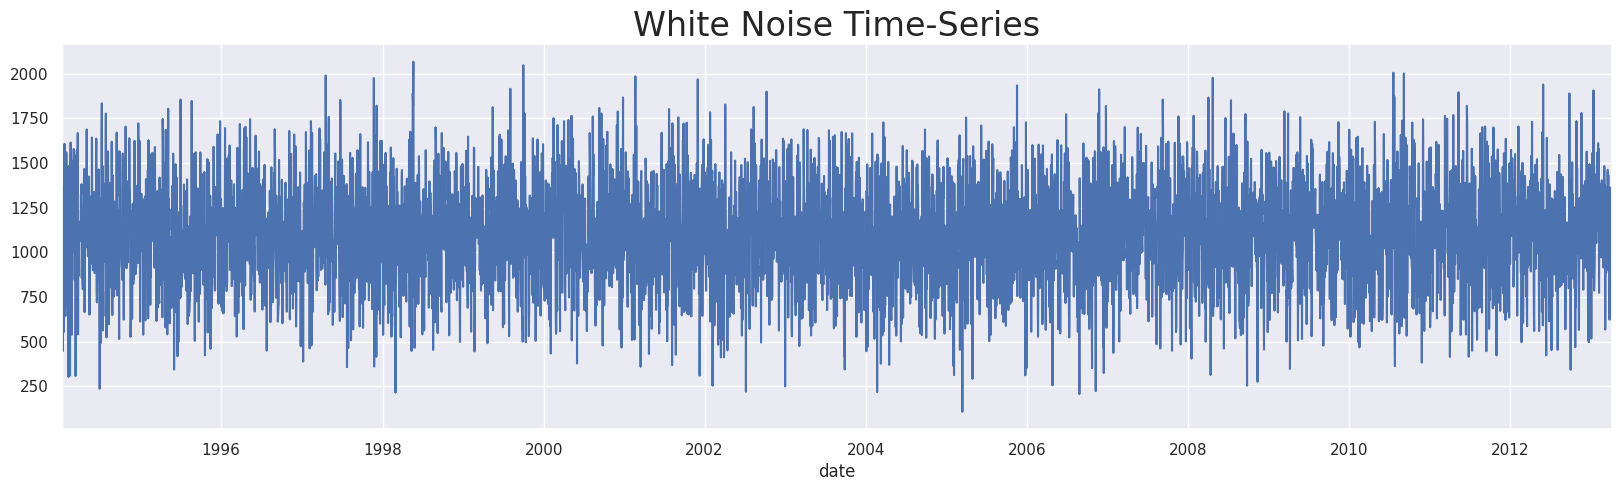

In [ ]:
df.wn.plot(figsize = (20,5))
plt.title("White Noise Time-Series", size= 24)
plt.show()

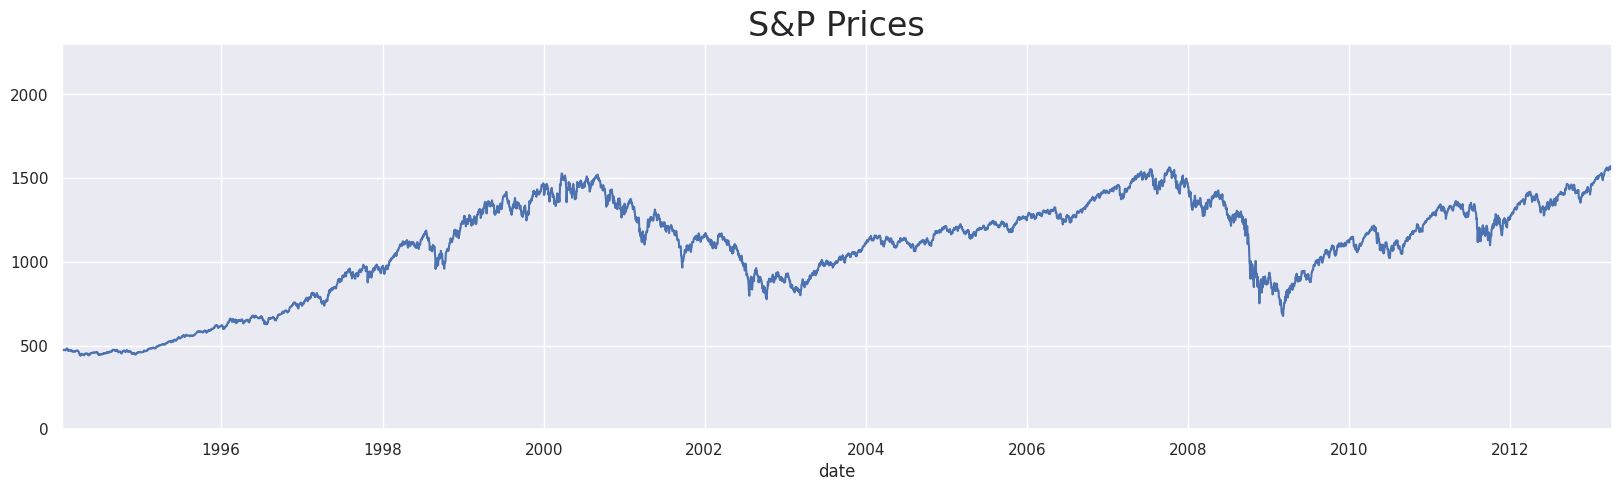

In [ ]:
df.market_value.plot(figsize=(20,5))
plt.title("S&P Prices", size = 24)
plt.ylim(0,2300)
plt.show()

**Random Walk**

In [ ]:
rw = pd.read_csv("RandWalk.csv")

In [ ]:
rw.head(5)

,date,price
0,07/01/1994,1122.139662
1,08/01/1994,1135.238562
2,09/01/1994,1109.897831
3,10/01/1994,1080.347860
4,11/01/1994,1082.095245


In [ ]:
rw.date=pd.to_datetime(rw.date, dayfirst=True)

In [ ]:
rw.set_index("date",inplace=True)

In [ ]:
rw.head()

,price
date,
1994-01-07,1122.139662
1994-01-08,1135.238562
1994-01-09,1109.897831
1994-01-10,1080.347860
1994-01-11,1082.095245


In [ ]:
rw = rw.asfreq('b')

In [ ]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [ ]:
df ['rw'] = rw.price

<ipython-input-52-eb54a598b334>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df ['rw'] = rw.price


In [ ]:
df.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,766.679075,1122.139662
1994-01-10,475.27,994.444834,1080.347860
1994-01-11,474.13,1366.408110,1082.095245
1994-01-12,474.17,1161.257334,1083.639265
1994-01-13,472.47,447.026118,1067.146255


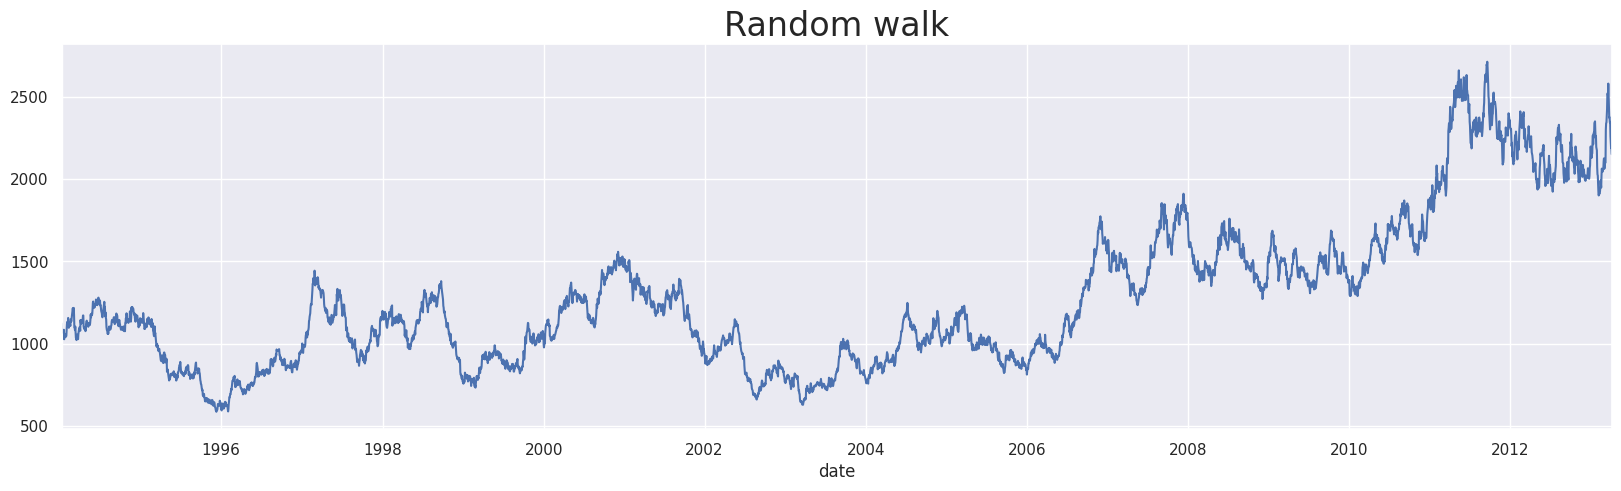

In [ ]:
df.rw.plot(figsize =(20,5))
plt.title("Random walk", size =24)
plt.show()

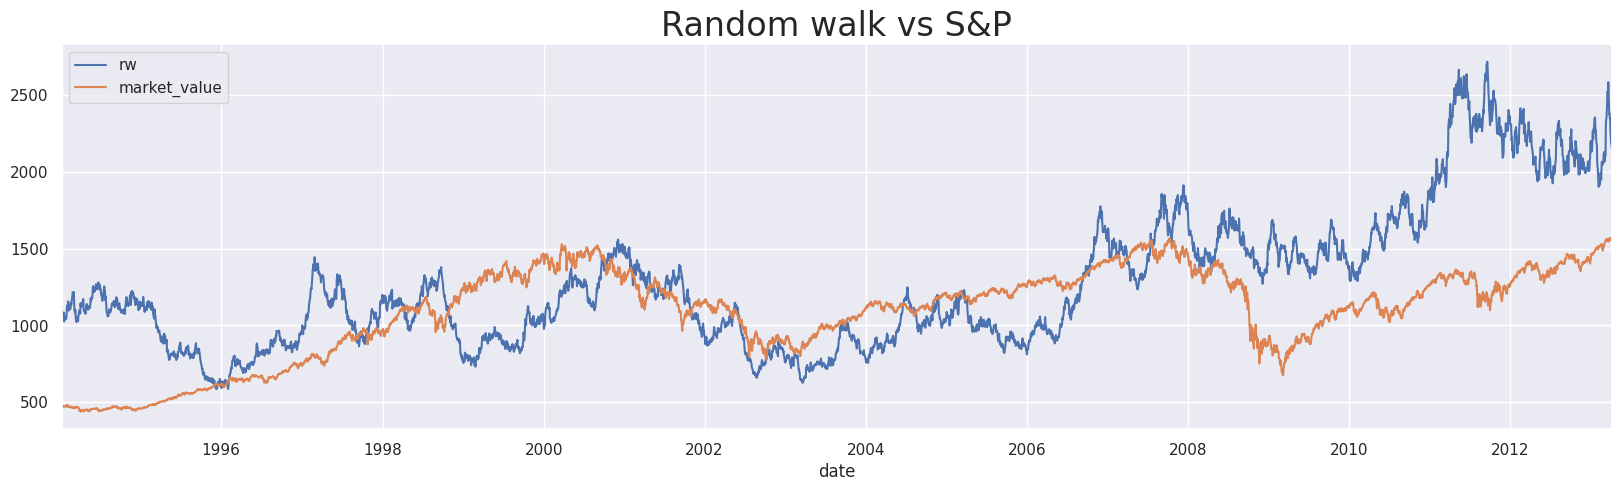

In [ ]:
df.rw.plot(figsize =(20,5))
df.market_value.plot()
plt.title("Random walk vs S&P", size =24)
plt.legend()
plt.show()

**PRUEBA DE DICKEY-FULLER**

In [ ]:
sts.adfuller(df.market_value)

(-1.7369847452352456,
 0.4121645696770613,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

In [ ]:
sts.adfuller(df.rw)

(-1.3286073927689719,
 0.6159849181617385,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

In [ ]:
sts.adfuller(wn)

(-71.44797477951016,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70856.32713683082)

**Descomposición de las series**

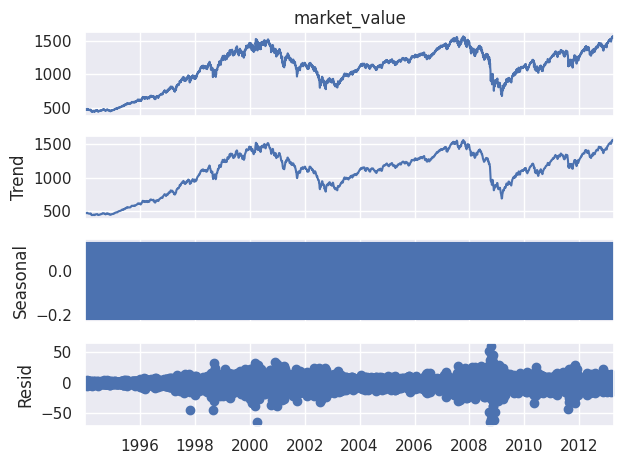

In [ ]:
des_adit = seasonal_decompose(df.market_value, model = "aditive")
des_adit.plot()
plt.show()

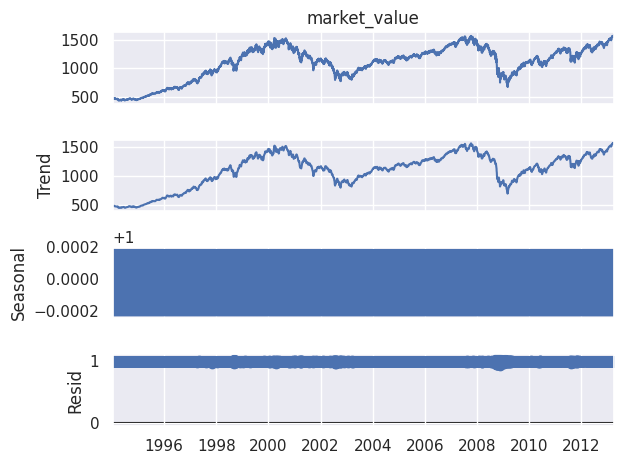

In [ ]:
des_mul = seasonal_decompose(df.market_value, model = "multiplicative")
des_mul.plot()
plt.show()

**Filtro Hodick-Prescott**

In [ ]:
data = pd.read_csv("macrodata.csv", index_col=0, parse_dates=True)
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


[Text(0, 0.5, 'Real GDP')]

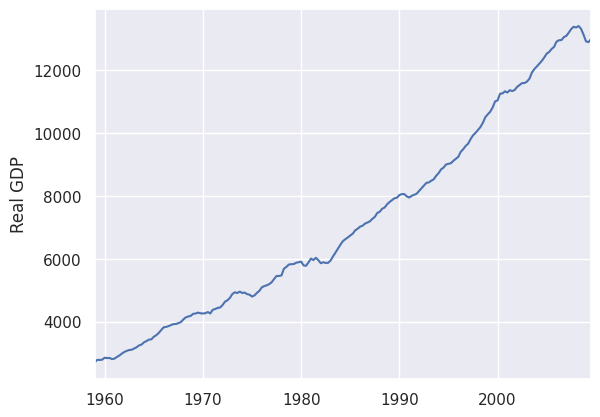

In [ ]:
ax = data['realgdp'].plot()
ax.autoscale(axis='x', tight = True)
ax.set(ylabel='Real GDP')

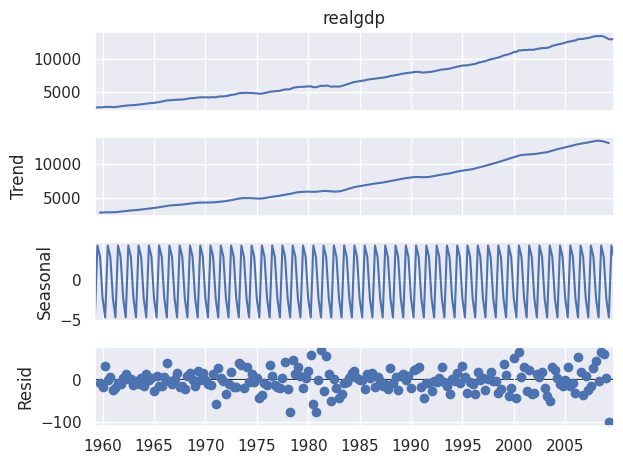

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
gdp_adit = seasonal_decompose(data['realgdp'], model ='aditive')
gdp_adit.plot()
plt.show()

In [ ]:
from statsmodels.tsa.filters.hp_filter import hpfilter
gdp_ciclo, gdp_tendencia = hpfilter(data['realgdp'], lamb=1600)

In [ ]:
data['Tendencia'] = gdp_tendencia

In [ ]:
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint,Tendencia
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00,2670.837085
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74,2698.712468
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09,2726.612545
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06,2754.612067
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19,2782.816333


<Axes: >

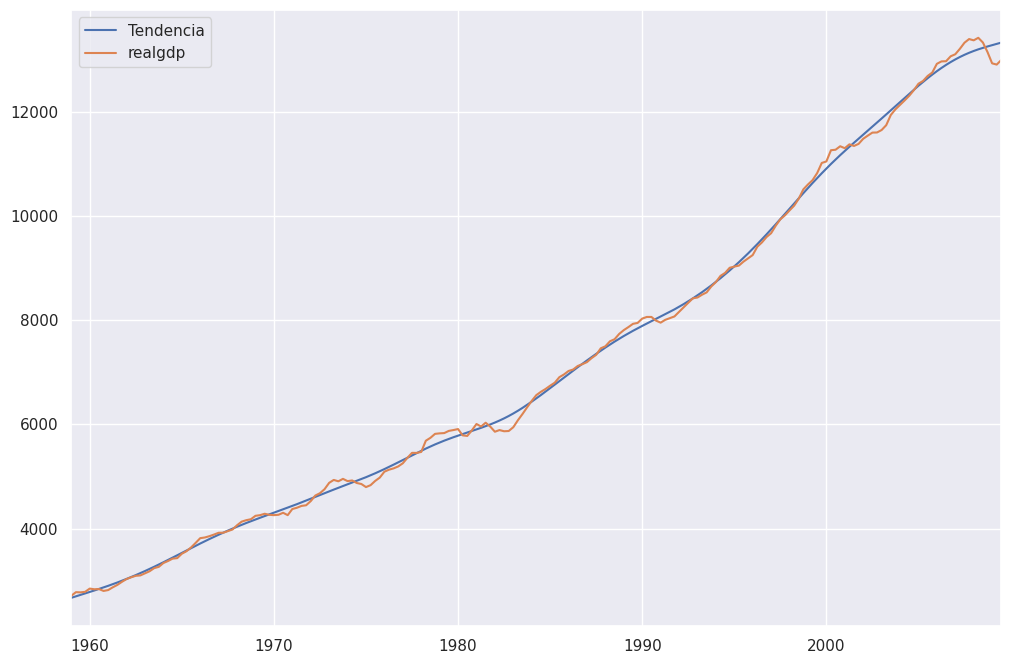

In [ ]:
data[['Tendencia','realgdp']].plot(figsize=(12,8))

**ACF**

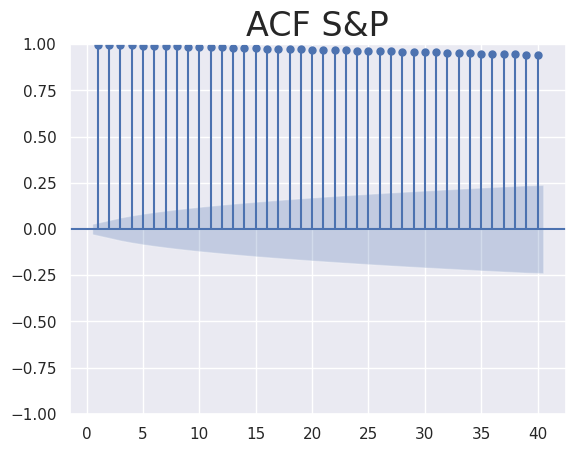

In [ ]:
sgt.plot_acf(df.market_value, lags = 40, zero=False) #Zero es para el primero con el primero
plt.title("ACF S&P", size =24)
plt.show()

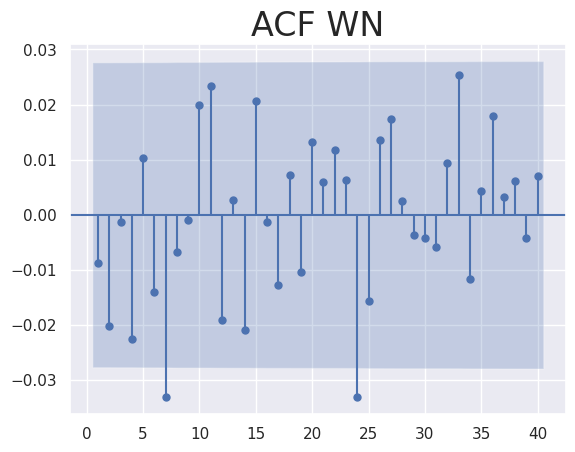

In [ ]:
sgt.plot_acf(df.wn, lags=40, zero = False)
plt.title("ACF WN", size = 24)
plt.autoscale()
plt.show()

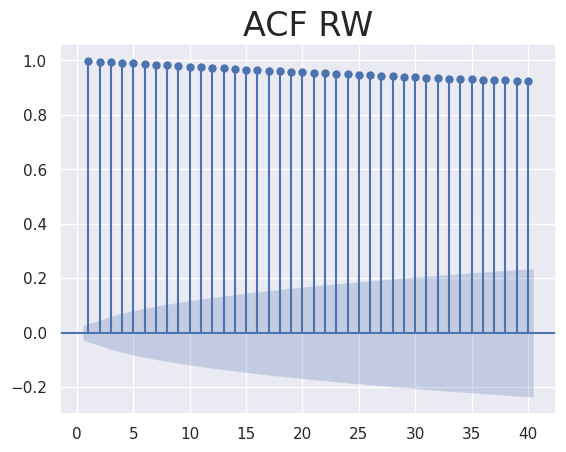

In [ ]:
sgt.plot_acf(df.rw, lags=40, zero = False)
plt.title("ACF RW", size = 24)
plt.autoscale()
plt.show()

**Autocorrelación parcial**

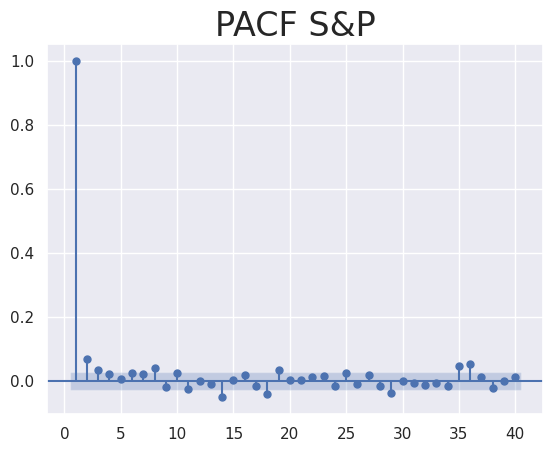

In [ ]:
sgt.plot_pacf(df.market_value, lags=40, zero = False, method = ('ols'))
plt.title("PACF S&P", size = 24)
plt.autoscale()
plt.show()

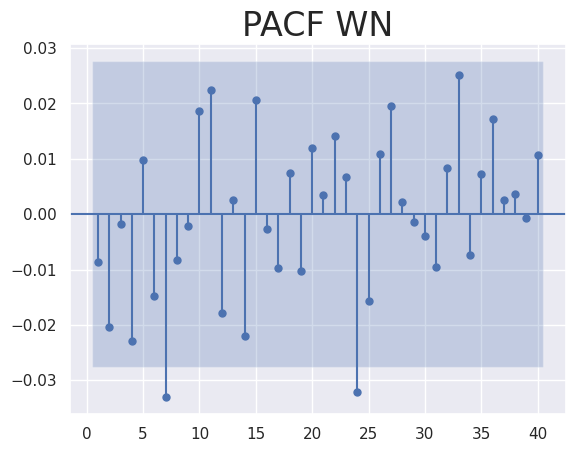

In [ ]:
sgt.plot_pacf(df.wn, lags=40, zero = False, method = ('ols'))
plt.title("PACF WN", size = 24)
plt.autoscale()
plt.show()  # No hay autocorrelación parcial

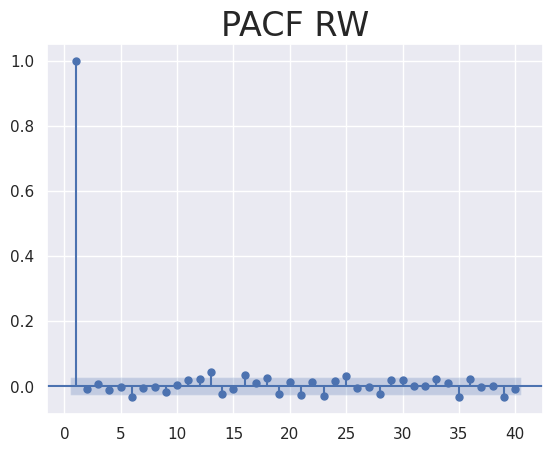

In [ ]:
sgt.plot_pacf(df.rw, lags=40, zero = False, method = ('ols'))
plt.title("PACF RW", size = 24)
plt.autoscale()
plt.show()